In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import random
import json

load dataset

In [ ]:

# df
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("maharshipandya/spotify-tracks-dataset")
df = pd.DataFrame(dataset['train'])


df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['popularity', 'duration_ms', 'loudness', 'tempo']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])

# Check the first few rows to see the normalized data
df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,False,0.676,0.4610,...,0.791392,0,0.1430,0.0322,0.000001,0.3580,0.7150,0.361245,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,False,0.420,0.1660,...,0.597377,1,0.0763,0.9240,0.000006,0.1010,0.2670,0.318397,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,False,0.438,0.3590,...,0.736123,1,0.0557,0.2100,0.000000,0.1170,0.1200,0.313643,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,False,0.266,0.0596,...,0.573701,1,0.0363,0.9050,0.000071,0.1320,0.1430,0.746758,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,False,0.618,0.4430,...,0.737103,1,0.0526,0.4690,0.000000,0.0829,0.1670,0.492863,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,0.21,0.073511,False,0.172,0.2350,...,0.612952,1,0.0422,0.6400,0.928000,0.0863,0.0339,0.517705,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,0.22,0.073511,False,0.174,0.1170,...,0.577345,0,0.0401,0.9940,0.976000,0.1050,0.0350,0.350242,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,0.22,0.051833,False,0.629,0.3290,...,0.714648,0,0.0420,0.8670,0.000000,0.0839,0.7430,0.543933,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,0.41,0.054206,False,0.587,0.5060,...,0.714759,1,0.0297,0.3810,0.000000,0.2700,0.4130,0.558651,4,world-music


In [ ]:
import pandas as pd

selected_genres = [
    "rock", "pop", "electronic", "hip-hop", "jazz",
    "classical", "reggae", "blues", "country", "folk",
    "soul", "metal", "new-age", "industrial"
]

# Filter the DataFrame to only include the selected genres
filtered_df = df[df['track_genre'].isin(selected_genres)]

# Initialize an empty DataFrame to store the selected songs
selected_songs_df = pd.DataFrame()

for genre in selected_genres:
    genre_songs = filtered_df[filtered_df['track_genre'] == genre]
    if len(genre_songs) > 100:
        selected_songs = genre_songs.sample(n=100, random_state=42)  # Ensure reproducibility
    else:
        selected_songs = genre_songs
    selected_songs_df = pd.concat([selected_songs_df, selected_songs], ignore_index=True)

selected_songs_df.reset_index(drop=True, inplace=True)

selected_songs_df


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,91521,2Wzl4bZLjqFUOeZaGrTaVJ,YUNGBLUD,Drippy Drippy,parents,0.00,0.032846,True,0.594,0.833,...,0.836432,0,0.0507,0.009670,0.000000,0.3000,0.5990,0.337097,4,rock
1,91737,1UEj7RpdqH02grDvdxTKLP,All Time Low,Alternative Christmas 2022,"Merry Christmas, Kiss My Ass",0.00,0.038045,False,0.574,0.966,...,0.860052,1,0.0685,0.014100,0.000000,0.4300,0.7880,0.526084,4,rock
2,91740,3SCYKwSFwlSe5xEvVlcP1W,George Strait,Country Christmas Greatest Hits,Jingle Bell Rock,0.01,0.025298,False,0.775,0.562,...,0.804432,0,0.0299,0.468000,0.000000,0.1740,0.7700,0.497321,4,rock
3,91660,1NhPKVLsHhFUHIOZ32QnS2,OneRepublic,Waking Up,Secrets,0.76,0.042902,False,0.516,0.764,...,0.801065,1,0.0366,0.071700,0.000000,0.1150,0.3760,0.608209,4,rock
4,91411,1ihSSnA4d0dcxQouy7gtNJ,Juanes,Retro Baladas,Es Por Ti,0.00,0.047948,False,0.694,0.761,...,0.803969,1,0.0263,0.176000,0.000036,0.1230,0.8660,0.533969,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,58436,73fVpzmGDZQ8B6TNXBN3di,Grendel,Harsh Generation,Void Malign,0.24,0.054023,False,0.493,0.989,...,0.805653,0,0.1110,0.000042,0.009540,0.3080,0.4050,0.558795,4,industrial
1396,58764,44sz0rNbTA687rs9CYi0IN,Nine Inch Nails,The Fragile,The Day The World Went Away,0.48,0.052253,False,0.168,0.235,...,0.770471,1,0.0404,0.032100,0.820000,0.0924,0.0618,0.524908,4,industrial
1397,58088,0vH3ZghvyoUSZmMNL1dTls,Skindred,Metal Lives!,Set It Off,0.00,0.035087,False,0.583,0.915,...,0.842055,1,0.0811,0.002140,0.000000,0.3950,0.8800,0.707136,4,industrial
1398,58063,1a8JpAL3vbAdXYrEABvOtb,Rammstein,"Reise, Reise",Amerika,0.68,0.043297,False,0.608,0.885,...,0.836709,0,0.0963,0.002580,0.000013,0.3920,0.5180,0.513712,4,industrial


Feature Vector

In [ ]:
# Shuffle the DataFrame
df_shuffled = selected_songs_df.sample(frac=1, random_state=42)  # random_state for reproducibility

# Select columns for the feature vector
feature_columns = [
    'track_name', 'popularity', 'duration_ms', 'danceability', 'energy',
    'loudness', 'speechiness', 'acousticness', 'instrumentalness',
    'valence', 'tempo', 'track_genre'
]



features_df = df_shuffled[feature_columns]

features_df = features_df.reset_index(drop=True)

numerical_features_df = features_df.drop('track_genre', axis=1)
numerical_features_df = numerical_features_df.drop('track_name', axis=1)

feature_vectors = numerical_features_df.to_numpy()

features_df


,track_name,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre
0,Suena El Dembow,0.00,0.037378,0.690,0.8580,0.834212,0.0529,0.189000,0.000000,0.755,0.377545,reggae
1,X ÚLTIMA VEZ,0.02,0.036751,0.812,0.8550,0.847271,0.0554,0.078900,0.000167,0.573,0.369969,reggae
2,"Kaalathukkum Nee Venum - From ""Vendhu Thanindh...",0.65,0.056049,0.718,0.4580,0.719512,0.0330,0.685000,0.002220,0.567,0.492900,pop
3,Hang Your Lights,0.00,0.056648,0.346,0.6050,0.785602,0.0794,0.188000,0.000000,0.747,0.830724,jazz
4,Orfeo,0.38,0.046874,0.628,0.8230,0.828200,0.0289,0.000074,0.000066,0.824,0.542125,electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Stormy Weather,0.00,0.035853,0.258,0.3500,0.746962,0.0307,0.716000,0.000000,0.448,0.729525,soul
1396,Teardrinker,0.00,0.061197,0.457,0.9790,0.845218,0.0485,0.000010,0.119000,0.227,0.521860,metal
1397,Nightfall,0.20,0.083639,0.428,0.0653,0.645728,0.0472,0.991000,0.904000,0.214,0.326007,new-age
1398,Christmas Makes Me Cry - From The Kacey Musgra...,0.00,0.035013,0.506,0.2100,0.684331,0.0569,0.808000,0.000000,0.414,0.428073,country


Cosine Similarity

In [ ]:
!pip install scikit-learn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_vectors)

print("Shape of cosine similarity matrix:", cosine_sim_matrix.shape)

print("Sample of the cosine similarity matrix:\n", cosine_sim_matrix[:5, :5])


Shape of cosine similarity matrix: (1400, 1400)
Sample of the cosine similarity matrix:
 [[1.         0.98851759 0.83376075 0.92389882 0.96143199]
 [0.98851759 1.         0.81808241 0.89235385 0.95295425]
 [0.83376075 0.81808241 1.         0.80878668 0.86358401]
 [0.92389882 0.89235385 0.80878668 1.         0.92795423]
 [0.96143199 0.95295425 0.86358401 0.92795423 1.        ]]


Pearson Correlation

In [ ]:
import numpy as np
import pandas as pd


df_transposed = numerical_features_df.T

# Compute Pearson correlation matrix
cosine_sim_matrix = df_transposed.corr(method='pearson')
cosine_sim_matrix = cosine_sim_matrix.to_numpy()


# Inspect the shape and a portion of the matrix
print("Shape of Pearson correlation matrix:", cosine_sim_matrix.shape)
print("Sample of the Pearson correlation matrix:\n", cosine_sim_matrix[:5, :5])


Shape of Pearson correlation matrix: (1400, 1400)
Sample of the Pearson correlation matrix:
 [[1.         0.97637951 0.58648559 0.83222467 0.91388312]
 [0.97637951 1.         0.56892388 0.77043562 0.90062693]
 [0.58648559 0.56892388 1.         0.50642573 0.63200062]
 [0.83222467 0.77043562 0.50642573 1.         0.83412989]
 [0.91388312 0.90062693 0.63200062 0.83412989 1.        ]]


In [ ]:
track_id = 1

# Get the similarity scores for this track and all others
sim_scores = list(enumerate(cosine_sim_matrix[track_id]))

# Sort the tracks based on the similarity scores
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

# Get the scores of the 5 most similar tracks (excluding the first one, which is the track itself)
most_similar_tracks = sim_scores[0:100]

print("Most similar tracks to track ID 0 and their similarity scores:")
for i, score in most_similar_tracks:
    print(f"Track ID: {i}, Similarity Score: {score:.2f}")


Most similar tracks to track ID 0 and their similarity scores:
Track ID: 1, Similarity Score: 1.00
Track ID: 864, Similarity Score: 1.00
Track ID: 1247, Similarity Score: 1.00
Track ID: 384, Similarity Score: 1.00
Track ID: 442, Similarity Score: 1.00
Track ID: 23, Similarity Score: 1.00
Track ID: 942, Similarity Score: 1.00
Track ID: 347, Similarity Score: 1.00
Track ID: 232, Similarity Score: 1.00
Track ID: 461, Similarity Score: 1.00
Track ID: 207, Similarity Score: 0.99
Track ID: 970, Similarity Score: 0.99
Track ID: 1079, Similarity Score: 0.99
Track ID: 742, Similarity Score: 0.99
Track ID: 698, Similarity Score: 0.99
Track ID: 754, Similarity Score: 0.99
Track ID: 326, Similarity Score: 0.99
Track ID: 203, Similarity Score: 0.99
Track ID: 1288, Similarity Score: 0.99
Track ID: 988, Similarity Score: 0.99
Track ID: 696, Similarity Score: 0.99
Track ID: 84, Similarity Score: 0.99
Track ID: 1012, Similarity Score: 0.99
Track ID: 940, Similarity Score: 0.99
Track ID: 1255, Similarit

Network Creation

In [ ]:
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
# Initialize an undirected graph
G = nx.Graph()

# Add nodes
for i in range(len(features_df)):
    G.add_node(i, genre=features_df.loc[i, 'track_genre'])

# Add edges based on cosine similarity threshold
for i in range(cosine_sim_matrix.shape[0]):
    for j in range(i+1, cosine_sim_matrix.shape[1]):  # Ensure i < j to avoid self-loops and duplicate edges
        if cosine_sim_matrix[i, j] > 0.98:
            G.add_edge(i, j, weight=cosine_sim_matrix[i, j])


print("Graph Information")
print("------------------")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
plt.figure(figsize=(12, 12))
# nx.draw(G, with_labels=False, node_size=20)
# plt.show()


Graph Information
------------------
Number of nodes: 1400
Number of edges: 7131


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

Louvain

In [ ]:
# # !pip uninstall networkx
# !pip uninstall python-louvain
# !pip uninstall community
# !pip install python-louvain
# !pip install networkx

!pip install cdlib
# import community as community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx


# partition = community_louvain.best_partition(G)

# num_communities = len(set(partition.values()))
# print(f"Number of communities detected: {num_communities}")


# # cmap = cm.get_cmap('viridis', num_communities)
# # plt.figure(figsize=(10, 10))
# # pos = nx.spring_layout(G)  # positions for all nodes

# # for i, com in enumerate(set(partition.values())):
# #     list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
# #     nx.draw_networkx_nodes(G, pos, list_nodes, node_size=20, node_color=np.array([cmap(i)]))

# # nx.draw_networkx_edges(G, pos, alpha=0.5)
# # plt.show()

from cdlib import algorithms

# Apply the Louvain method with a specific resolution using cdlib
communities = algorithms.louvain(G, resolution=1)  # Adjust the resolution parameter as needed

# communities object contains the partition information
# To match the previous approach, you might want to convert it into a similar structure
partition = {node: cid for cid, community in enumerate(communities.communities) for node in community}

# Now, you can proceed as before
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

# Visualization and further analysis can follow using the partition dictionary as before


Number of communities detected: 349


In [ ]:


# Map nodes to genres
node_to_genre = {i: genre for i, genre in enumerate(features_df['track_genre'])}

# Calculate purity for each community
purity_dict = {}
for community_id in set(partition.values()):
    nodes_in_community = [node for node, com_id in partition.items() if com_id == community_id]
    genres_in_community = [node_to_genre[node] for node in nodes_in_community]
    most_common_genre = max(set(genres_in_community), key=genres_in_community.count)
    purity = genres_in_community.count(most_common_genre) / len(genres_in_community)
    purity_dict[community_id] = purity

# Calculate overall purity
overall_purity = sum(purity_dict.values()) / len(purity_dict)
print(f"Overall Cluster Purity: {overall_purity}")



Overall Cluster Purity: 0.9223186019059929


In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
true_labels_encoded = le.fit_transform(features_df['track_genre'])


community_labels_encoded = np.array([partition[node] for node in range(len(features_df))])

nmi_score = normalized_mutual_info_score(true_labels_encoded, community_labels_encoded)
ari_score = adjusted_rand_score(true_labels_encoded, community_labels_encoded)

print(f"NMI Score: {nmi_score}")
print(f"ARI Score: {ari_score}")


NMI Score: 0.39528829859498654
ARI Score: 0.1152195515621734


In [ ]:
import pandas as pd

# Assuming 'partition' is your community assignment, and 'features_df' contains 'track_genre'
node_to_genre = {i: genre for i, genre in enumerate(features_df['track_genre'])}

# Map each community to the list of genres it contains
community_to_genres = {}
for node, community in partition.items():
    if community not in community_to_genres:
        community_to_genres[community] = []
    community_to_genres[community].append(node_to_genre[node])

# Convert the mapping to a DataFrame for easier analysis
community_genre_df = pd.DataFrame([(community, genre)
                                   for community, genres in community_to_genres.items()
                                   for genre in genres], columns=['Community', 'Genre'])

# Display the genre distribution for each community
genre_distribution = community_genre_df.groupby(['Community', 'Genre']).size().unstack(fill_value=0)
print(genre_distribution)
print(genre_distribution.iloc[4])
print(genre_distribution.iloc[5])



Genre      blues  classical  country  electronic  folk  hip-hop  industrial  \
Community                                                                     
0              8          0        3          23     9       15          16   
1             17          0        4          13    10        7          40   
2              0         50        0           0     0        0           0   
3              5          0       15           2     3        2           8   
4              1          0       10           2     1       13           0   
...          ...        ...      ...         ...   ...      ...         ...   
344            0          0        0           0     0        0           0   
345            0          0        0           0     1        0           0   
346            0          0        0           0     0        0           0   
347            0          0        0           1     0        0           0   
348            1          0        0           0    

In [ ]:
# Calculate purity for each genre in each community
genre_purity = {}
for community in genre_distribution.index:
    for genre in genre_distribution.columns:
        total_in_community = genre_distribution.loc[community].sum()
        genre_count = genre_distribution.loc[community, genre]
        purity = genre_count / total_in_community if total_in_community > 0 else 0
        if genre not in genre_purity:
            genre_purity[genre] = []
        genre_purity[genre].append(purity)

# Calculate average purity for each genre across all communities
average_genre_purity = {genre: np.mean(purities) for genre, purities in genre_purity.items()}
print(average_genre_purity)


{'blues': 0.06431863221704295, 'classical': 0.0914434848818803, 'country': 0.03566019167727356, 'electronic': 0.1494376093504924, 'folk': 0.10012691510623069, 'hip-hop': 0.08243104477159865, 'industrial': 0.08891792000888599, 'jazz': 0.05913023171204561, 'metal': 0.030532737025370304, 'new-age': 0.09069005549611237, 'pop': 0.08258176357094327, 'reggae': 0.033291527680869404, 'rock': 0.04347407216391752, 'soul': 0.04796381433733694}


In [ ]:

communities = {}
for node, community_id in partition.items():
    communities.setdefault(community_id, []).append(node)

# Initialize a DataFrame to store the selected songs with their community IDs for easier analysis
features_df['community_id'] = features_df.index.map(partition)

# Calculate purity for each genre in communities with more than 5 nodes
genre_purity = {}
for community_id, nodes in communities.items():
    if len(nodes) > 1:  # Check if the community size is greater than 5
        community_df = features_df[features_df['community_id'] == community_id]
        genre_counts = community_df['track_genre'].value_counts()
        total_tracks = sum(genre_counts)
        for genre, count in genre_counts.iteritems():
            purity = count / total_tracks
            genre_purity.setdefault(genre, []).append(purity)

# Calculate average purity for each genre across all communities
average_genre_purity = {genre: np.mean(purities) for genre, purities in genre_purity.items()}
print("Average Genre Purity in Communities with More than 5 Nodes:")
for genre, purity in average_genre_purity.items():
    print(f"{genre}: {purity:.2f}")


Average Genre Purity in Communities with More than 5 Nodes:
metal: 0.30
electronic: 0.34
industrial: 0.45
pop: 0.30
hip-hop: 0.38
rock: 0.17
folk: 0.36
reggae: 0.23
blues: 0.27
soul: 0.20
new-age: 0.33
country: 0.26
jazz: 0.26
classical: 0.49


In [ ]:
import pandas as pd
import numpy as np


features_df['community'] = [partition[node] for node in range(len(features_df))]

genre_evaluation = pd.DataFrame(index=selected_genres, columns=['Predominant Community', 'Concentration', 'Spread'])

for genre in selected_genres:
    # Filter tracks of the current genre
    genre_tracks = features_df[features_df['track_genre'] == genre]

    # Find the most common community for this genre
    predominant_community = genre_tracks['community'].mode()[0]

    # Calculate the concentration: proportion of genre tracks in the predominant community
    concentration = np.sum(genre_tracks['community'] == predominant_community) / len(genre_tracks)

    # Calculate the spread: number of unique communities containing this genre
    spread = genre_tracks['community'].nunique()

    # Update the DataFrame
    genre_evaluation.loc[genre] = [predominant_community, concentration, spread]

genre_evaluation['Concentration'] = pd.to_numeric(genre_evaluation['Concentration'])

print(genre_evaluation)


           Predominant Community  Concentration Spread
rock                           3           0.28     26
pop                            0           0.15     47
electronic                     0           0.23     62
hip-hop                        0           0.15     40
jazz                           6           0.33     34
classical                      2           0.50     38
reggae                         4           0.35     24
blues                          1           0.17     40
country                        3           0.15     25
folk                           1           0.10     56
soul                           5           0.22     28
metal                          0           0.47     17
new-age                        2           0.59     37
industrial                     1           0.40     36


girvan newman

In [ ]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import itertools


# Apply Girvan-Newman algorithm
communities_generator = girvan_newman(G)


first_level_communities = next(communities_generator)

# Convert communities set to a list of lists for easier processing
communities = [list(community) for community in first_level_communities]

print(f"Number of communities detected: {len(communities)}")
for i, community in enumerate(communities):
    print(f"Community {i+1} (size {len(community)}): {community[:5]}...")  # Print first 5 nodes


partition = {}
for cid, community in enumerate(communities):
    for node in community:
        partition[node] = cid

num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")


Number of communities detected: 337
Community 1 (size 707): [0, 1, 3, 4, 5]...
Community 2 (size 3): [336, 2, 245]...
Community 3 (size 1): [6]...
Community 4 (size 9): [865, 677, 7, 139, 1326]...
Community 5 (size 1): [8]...
Community 6 (size 136): [514, 9, 525, 1043, 533]...
Community 7 (size 2): [368, 10]...
Community 8 (size 1): [12]...
Community 9 (size 1): [13]...
Community 10 (size 1): [16]...
Community 11 (size 1): [18]...
Community 12 (size 1): [24]...
Community 13 (size 1): [28]...
Community 14 (size 1): [29]...
Community 15 (size 1): [31]...
Community 16 (size 2): [32, 1224]...
Community 17 (size 12): [128, 672, 1186, 37, 69]...
Community 18 (size 7): [39, 906, 944, 1077, 950]...
Community 19 (size 1): [42]...
Community 20 (size 1): [43]...
Community 21 (size 3): [1312, 44, 127]...
Community 22 (size 3): [49, 393, 63]...
Community 23 (size 1): [52]...
Community 24 (size 1): [56]...
Community 25 (size 1): [60]...
Community 26 (size 3): [1032, 65, 186]...
Community 27 (size 2)

In [ ]:


# Map nodes to genres
node_to_genre = {i: genre for i, genre in enumerate(features_df['track_genre'])}

purity_dict = {}
for community_id in set(partition.values()):
    nodes_in_community = [node for node, com_id in partition.items() if com_id == community_id]
    genres_in_community = [node_to_genre[node] for node in nodes_in_community]
    most_common_genre = max(set(genres_in_community), key=genres_in_community.count)
    purity = genres_in_community.count(most_common_genre) / len(genres_in_community)
    purity_dict[community_id] = purity

# Calculate overall purity
overall_purity = sum(purity_dict.values()) / len(purity_dict)
print(f"Overall Cluster Purity: {overall_purity}")



Overall Cluster Purity: 0.9409955260668326


In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
true_labels_encoded = le.fit_transform(features_df['track_genre'])

community_labels_encoded = np.array([partition[node] for node in range(len(features_df))])

nmi_score = normalized_mutual_info_score(true_labels_encoded, community_labels_encoded)
ari_score = adjusted_rand_score(true_labels_encoded, community_labels_encoded)

print(f"NMI Score: {nmi_score}")
print(f"ARI Score: {ari_score}")


NMI Score: 0.3878265119253189
ARI Score: 0.06145720975265387


In [ ]:
import pandas as pd

node_to_genre = {i: genre for i, genre in enumerate(features_df['track_genre'])}

# Map each community to the list of genres it contains
community_to_genres = {}
for node, community in partition.items():
    if community not in community_to_genres:
        community_to_genres[community] = []
    community_to_genres[community].append(node_to_genre[node])

# Convert the mapping to a DataFrame for easier analysis
community_genre_df = pd.DataFrame([(community, genre)
                                   for community, genres in community_to_genres.items()
                                   for genre in genres], columns=['Community', 'Genre'])

# Display the genre distribution for each community
genre_distribution = community_genre_df.groupby(['Community', 'Genre']).size().unstack(fill_value=0)
print(genre_distribution)


Genre      blues  classical  country  electronic  folk  hip-hop  industrial  \
Community                                                                     
0             52          1       66          40    32       63          64   
1              0          0        0           0     0        2           0   
2              0          0        0           1     0        0           0   
3              0          0        2           0     2        0           0   
4              0          0        0           0     1        0           0   
...          ...        ...      ...         ...   ...      ...         ...   
332            0          0        0           0     0        0           0   
333            0          0        0           0     1        0           0   
334            0          0        0           0     0        0           0   
335            0          0        0           1     0        0           0   
336            1          0        0           0    

In [ ]:
# Calculate purity for each genre in each community
genre_purity = {}
for community in genre_distribution.index:
    for genre in genre_distribution.columns:
        total_in_community = genre_distribution.loc[community].sum()
        genre_count = genre_distribution.loc[community, genre]
        purity = genre_count / total_in_community if total_in_community > 0 else 0
        if genre not in genre_purity:
            genre_purity[genre] = []
        genre_purity[genre].append(purity)

# Calculate average purity for each genre across all communities
average_genre_purity = {genre: np.mean(purities) for genre, purities in genre_purity.items()}
print(average_genre_purity)


{'blues': 0.06429962922482309, 'classical': 0.09437824832529385, 'country': 0.031433101979125425, 'electronic': 0.15407490727877365, 'folk': 0.10214939654701576, 'hip-hop': 0.08089415766502467, 'industrial': 0.09087197825335734, 'jazz': 0.05915860986143498, 'metal': 0.02806889421455923, 'new-age': 0.09382034237386286, 'pop': 0.08190706579073737, 'reggae': 0.030611528723877048, 'rock': 0.041394766424751095, 'soul': 0.046937373337363655}


In [ ]:

communities = {}
for node, community_id in partition.items():
    communities.setdefault(community_id, []).append(node)

features_df['community_id'] = features_df.index.map(partition)


genre_purity = {}
for community_id, nodes in communities.items():
    if len(nodes) > 1:  # Check if the community size is greater than 1
        community_df = features_df[features_df['community_id'] == community_id]
        genre_counts = community_df['track_genre'].value_counts()
        total_tracks = sum(genre_counts)
        for genre, count in genre_counts.iteritems():
            purity = count / total_tracks
            genre_purity.setdefault(genre, []).append(purity)

# Calculate average purity for each genre across all communities
average_genre_purity = {genre: np.mean(purities) for genre, purities in genre_purity.items()}
print("Average Genre Purity in Communities with More than 1 Node:")
for genre, purity in average_genre_purity.items():
    print(f"{genre}: {purity:.2f}")

Average Genre Purity in Communities with More than 5 Nodes:
metal: 0.49
reggae: 0.33
rock: 0.24
country: 0.37
soul: 0.26
industrial: 0.52
hip-hop: 0.53
pop: 0.41
blues: 0.35
electronic: 0.41
folk: 0.50
jazz: 0.33
new-age: 0.37
classical: 0.53


In [ ]:
import pandas as pd
import numpy as np


features_df['community'] = [partition[node] for node in range(len(features_df))]

# Initialize a DataFrame to store genre evaluation metrics
genre_evaluation = pd.DataFrame(index=selected_genres, columns=['Predominant Community', 'Concentration', 'Spread'])

for genre in selected_genres:
    # Filter tracks of the current genre
    genre_tracks = features_df[features_df['track_genre'] == genre]

    # Find the most common community for this genre
    predominant_community = genre_tracks['community'].mode()[0]

    # Calculate the concentration: proportion of genre tracks in the predominant community
    concentration = np.sum(genre_tracks['community'] == predominant_community) / len(genre_tracks)

    # Calculate the spread: number of unique communities containing this genre
    spread = genre_tracks['community'].nunique()

    # Update the DataFrame
    genre_evaluation.loc[genre] = [predominant_community, concentration, spread]

genre_evaluation['Concentration'] = pd.to_numeric(genre_evaluation['Concentration'])

print(genre_evaluation)


           Predominant Community  Concentration Spread
rock                           0           0.75     17
pop                            0           0.57     37
electronic                     0           0.40     59
hip-hop                        0           0.63     32
jazz                           5           0.57     28
classical                     33           0.50     37
reggae                         0           0.86     15
blues                          0           0.52     32
country                        0           0.66     15
folk                           0           0.32     46
soul                           0           0.65     21
metal                          0           0.89     11
new-age                       33           0.59     36
industrial                     0           0.64     34


In [ ]:
# Count the occurrences of each genre
genre_counts = features_df['track_genre'].value_counts()

# Display the genre distribution
print(genre_counts)


reggae        100
pop           100
jazz          100
electronic    100
blues         100
country       100
folk          100
hip-hop       100
classical     100
rock          100
soul          100
industrial    100
metal         100
new-age       100
Name: track_genre, dtype: int64


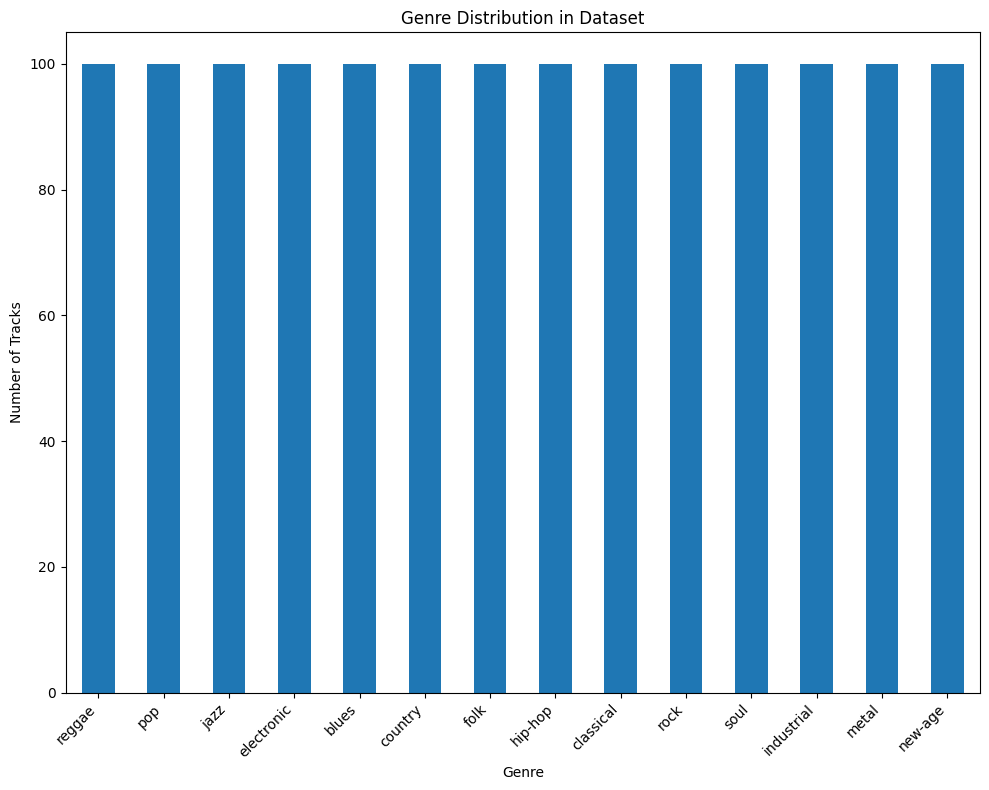

In [ ]:
import matplotlib.pyplot as plt

# Plot the genre distribution
plt.figure(figsize=(10, 8))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution in Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')  # Rotate labels to improve readability
plt.tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()


In [ ]:

# Get all unique genres
unique_genres = features_df['track_genre'].unique()

# Print all unique genres
print("Unique Genres in the Dataset:")
for genre in unique_genres:
    print(genre)


Unique Genres in the Dataset:
reggae
pop
jazz
electronic
blues
country
folk
hip-hop
classical
rock
soul
industrial
metal
new-age


Feature Importances:
popularity: 0.11276507305147795
duration_ms: 0.10988568467841199
danceability: 0.11036662142450818
energy: 0.11875610596047392
loudness: 0.10830345067505365
speechiness: 0.14186265478314525
acousticness: 0.09862128244854725
instrumentalness: 0.10504308186324134
valence: 0.0943960451151404


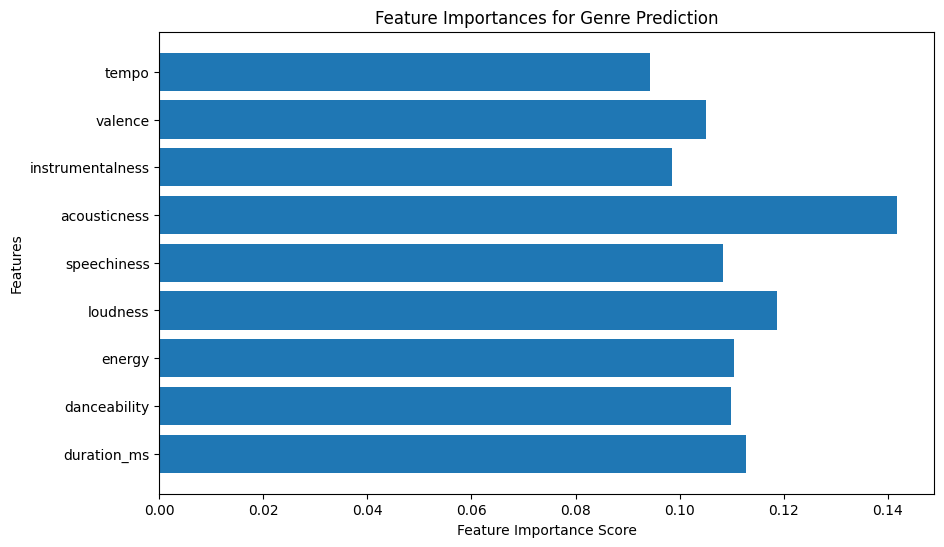

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

le = LabelEncoder()
features_df['track_genre_encoded'] = le.fit_transform(features_df['track_genre'])

X = features_df[[ 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']].to_numpy()
y = features_df['track_genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'], feature_importances):
    print(f"{feature}: {importance}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh([ 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'], feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances for Genre Prediction')
plt.show()
